In [ ]:
import keras
import matplotlib.pyplot as plt

In [ ]:
keras.backend.backend()

'tensorflow'

In [ ]:
from keras.datasets import fashion_mnist , mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape


(10000,)

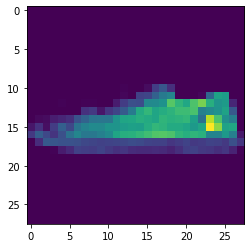

In [ ]:
plt.imshow(x_train[54000])

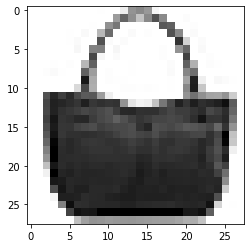

In [ ]:
plt.imshow(x_train[100], cmap = plt.cm.binary)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.4627451 , 0.09411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.18823529, 0.34509804, 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04705882, 0.39215686,
        0.83137255, 0.80392157, 0.7254902 , 0.70196078, 0.67843137,
        0.72941176, 0.75686275, 0.86666667, 0.55686275, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.29803922, 0.78039216, 0.88235294, 0.97254902, 1.        ,
        0.93333333, 0.8862

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape= [28,28]))
model.add(Dense(200, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 200)               157000    
                                                                 
 dense_11 (Dense)            (None, 200)               40200     
                                                                 
 dense_12 (Dense)            (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4775 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3594 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3217 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.8876
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.8942


In [ ]:
model.save("number.model")


In [ ]:
_model = keras.models.load_model("number.model")

In [ ]:
_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8600


[0.3888790011405945, 0.8600000143051147]

In [ ]:
predictions = _model.predict([x_test])

In [ ]:
predictions[0]

array([1.0605121e-04, 6.6011135e-06, 9.3714021e-05, 1.5156080e-05,
       4.7337668e-05, 6.0826642e-03, 1.5725486e-04, 4.5663923e-02,
       1.9420384e-06, 9.4782537e-01], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
class_labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot",]

Ankle boot
9


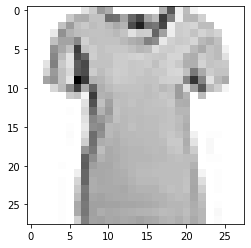

In [ ]:
data = 4000

predict_result = np.argmax(predictions[data])
print(class_labels[y_test[predict_result]])
print(y_test[predict_result])
plt.imshow(x_test[data], cmap = plt.cm.binary)

9